In [3]:
#!python -m pip install seaborn
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})

# Parameter variation mineral threshold
This script visualizes the results of the paramter variation study for different mineral threshold values. Further discussion on the results can be found in the report in chapter 4.3.

In [15]:
def generate_plot(files,title, show_legend=False):
    results = pd.read_csv(files[0]).T
    results['step'] = range(results.shape[0])

    results_2 = pd.read_csv(files[1]).T
    results_2['step'] = range(results_2.shape[0])
    results_2_value = pd.melt(results_2,id_vars='step').drop(['variable'],axis=1)['value']

    results_3 = pd.read_csv(files[2]).T
    results_3['step'] = range(results_3.shape[0])
    results_3_value = pd.melt(results_3,id_vars='step').drop(['variable'],axis=1)['value']

    df = pd.melt(results,id_vars='step').drop('variable',axis=1)
    df['experiment 2'] = results_2_value
    df['experiment 3'] = results_3_value
    
    df.columns = ['step','300','600','1000']

    fig = sns.lineplot(x='step', y='value', hue='variable', 
                data=pd.melt(df, ['step'])
                  )
    fig.set_title(title)
    fig.set(xlabel='Steps')
    fig.set(ylabel='Minerals Collected')
    fig.set_ylim([0,1050])
    fig.set_xlim([-10,240])
    if show_legend:
        fig.legend(title='Thresholds', loc='upper left')
    else:
        fig.get_legend().remove()    
    fig = fig.get_figure()
    plt.tight_layout()
    fig.savefig(f'{title}.pdf')

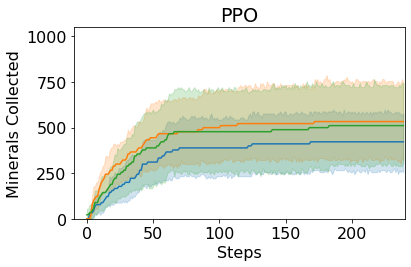

In [9]:
files = [   'experiment_16_300_PPO_step_results.csv',
            'experiment_16_600_PPO_step_results.csv',
            'experiment_16_1000_PPO_step_results.csv',
        ]

generate_plot(files,'PPO')

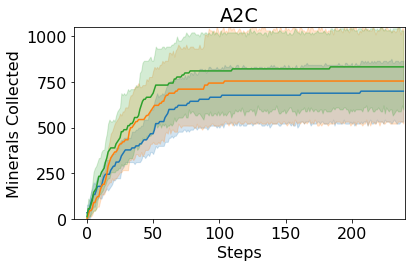

In [10]:
files = [
    

'experiment_17_300_A2C_step_results.csv',
'experiment_17_600_A2C_step_results.csv',
'experiment_17_1000_A2C_step_results.csv',
        ]
generate_plot(files,'A2C')

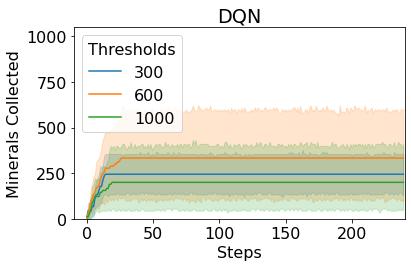

In [16]:
files = [

'experiment_18_300_DQN_step_results.csv',
'experiment_18_600_DQN_step_results.csv',
'experiment_18_1000_DQN_step_results.csv',
]
generate_plot(files,'DQN', show_legend=True)